In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
# Read dataset file
df = pd.read_csv('BTC.csv')
df = df[['Price']]
df = df.dropna() # Drop missing values
df

,Price
0,13444.9
1,14754.1
2,15156.6
3,15180.1
4,16954.8
...,...
1938,27591.4
1939,27509.3
1940,28298.8
1941,28424.6


In [3]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [4]:
#Holt-Winters Exponential Smoothing model
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])
# Define the model
model = LinearRegression()
# Train the model
model.fit(x_train, y_train)

LinearRegression()

In [7]:
# make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# make predictions on the validate set
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_vpred = model.predict(x_val)

In [8]:
# Forecast the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted Bitcoin closing prices for the next 30 days:')
y_next_30_days

Predicted Bitcoin closing prices for the next 30 days:


array([50457.17838127, 50484.72313364, 50512.26788602, 50539.8126384 ,
       50567.35739078, 50594.90214316, 50622.44689554, 50649.99164792,
       50677.5364003 , 50705.08115268, 50732.62590506, 50760.17065744,
       50787.71540982, 50815.2601622 , 50842.80491458, 50870.34966695,
       50897.89441933, 50925.43917171, 50952.98392409, 50980.52867647,
       51008.07342885, 51035.61818123, 51063.16293361, 51090.70768599,
       51118.25243837, 51145.79719075, 51173.34194313, 51200.88669551,
       51228.43144789, 51255.97620027])

In [9]:
# calculate the RMSE
valid_rmse = np.sqrt(np.mean((y_vpred - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# calculate the MAPE
valid_mape = np.mean(np.abs((y_val - y_vpred) / y_val)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Validation MAPE:", valid_mape)
print("Testing MAPE:", test_mape)

# calculate the MAE
valid_mae = np.mean(np.abs(y_vpred - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))
print("Validation MAE:", valid_mae)
print("Testing MAPE:", test_mape)

Validation RMSE: 26292.117857969108
Testing RMSE: 16896.081022001938
Validation MAPE: 128.2091426511705
Testing MAPE: 49.06281195403777
Validation MAE: 26099.25008398956
Testing MAPE: 49.06281195403777


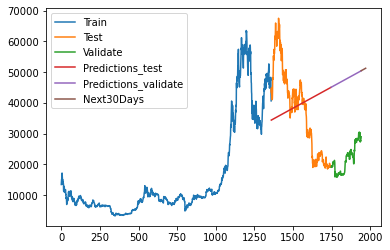

In [10]:
# ploting the actual values and predicted values
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_vpred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test','Validate', 'Predictions_test','Predictions_validate','Next30Days'])
plt.show()